## **Spotify Analysis**

## **Group Members:** 
* Antonia Sunseri 
* Manith Kumarapeli

## **Problem Statement**

This project investigates temporal trends in the characteristics of top-hit songs between 2000 and 2019 using the "Top Hits Spotify from 2000–2019" dataset available on Kaggle (https://www.kaggle.com/datasets/paradisejoy/top-hits-spotify-from-20002019). Our primary focus is to examine how the average duration of hit songs has changed over time and to explore possible cultural and economic factors influencing this shift.

In particular, we consider the role of the digital age—marked by shorter attention spans and the growing dominance of music streaming platforms—which may encourage the production of shorter songs to increase total play counts and streaming revenue. By analyzing changes in song length across two decades, our goal is to uncover patterns that reflect broader transformations in music consumption behavior.

Beyond song duration, we will also investigate how artist collaborations affect a song's popularity. Specifically, we will analyze whether tracks featuring guest artists, remixes, or genre-blending adaptations tend to perform better in popularity metrics. Finally, we will explore the evolution of music genres over time, identifying whether certain genres have risen or declined in popularity and whether these trends may reflect shifts in listener preferences.

Through our analysis, we hope to reveal how changes in listener behavior, industry economics, and cultural trends have impacted the popularity and structure of hit songs.

## **Description of Analysis & Wrangling Methods**

### **Wrangling Methods** 

* Checking for missing values
* Checking for duplicates
* Unique values
* Outlier detection & Removal 

In [154]:
# Checking for missing values 
import pandas as pd

dataframe_1 = pd.read_csv('songs_normalize.csv')

dataframe_1.isnull().sum().sort_values(ascending=False)

artist              0
song                0
tempo               0
valence             0
liveness            0
instrumentalness    0
acousticness        0
speechiness         0
mode                0
loudness            0
key                 0
energy              0
danceability        0
popularity          0
year                0
explicit            0
duration_ms         0
genre               0
dtype: int64

In [155]:
# Number of rows
len(dataframe_1)

2000

No missing values were present in the dataset. Therefore, there is no need for imputing missing values. 

In [156]:
# Removing duplciate rows

dataframe_filtered = dataframe_1.drop_duplicates()
duplicate_rows = len(dataframe_1) - (len(dataframe_filtered)) 
print(duplicate_rows)

59


59 duplicated rows are present. If there is a machine learning algorithm applied these rows could skew the results and introduce potential bias. 

In [157]:
# skim through the data
#for column in dataframe_1.columns:
 #   print(f"\nColumn: {column}")
  #  print(dataframe_1[column].unique())

# First 6 rows
dataframe_filtered.head()

print(dataframe_1.dtypes)

artist               object
song                 object
duration_ms           int64
explicit               bool
year                  int64
popularity            int64
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
genre                object
dtype: object


There seems to be no issue with the data types in the data frame as they seem to match exactly with the data types for each column.

In [158]:
# Summary of the overall unique values
dataframe_filtered.nunique()

artist               835
song                1879
duration_ms         1793
explicit               2
year                  23
popularity            76
danceability         565
energy               580
key                   12
loudness            1671
mode                   2
speechiness          837
acousticness        1208
instrumentalness     772
liveness             783
valence              760
tempo               1831
genre                 59
dtype: int64

### **Data Analysis** 

In [159]:
# Summary statistics on data frame
dataframe_filtered.describe()

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000
mean,228594.973725,2009.520350,59.633179,0.667814,0.721549,5.369397,-5.514082,0.553323,0.103783,0.128173,0.015372,0.181726,0.552966,120.158442
std,39249.796103,5.875532,21.501053,0.140608,0.152872,3.615270,1.938950,0.497277,0.096148,0.172584,0.088371,0.140910,0.220845,26.990475
min,113000.000000,1998.000000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.000000,0.023200,0.000019,0.000000,0.021500,0.038100,60.019000
25%,203506.000000,2004.000000,56.000000,0.581000,0.624000,2.000000,-6.490000,0.000000,0.039700,0.013500,0.000000,0.088400,0.390000,98.986000
50%,223186.000000,2010.000000,65.000000,0.676000,0.739000,6.000000,-5.285000,1.000000,0.061000,0.055800,0.000000,0.124000,0.560000,120.028000
75%,247946.000000,2015.000000,73.000000,0.765000,0.840000,8.000000,-4.168000,1.000000,0.129000,0.176000,0.000069,0.242000,0.731000,134.199000
max,484146.000000,2020.000000,89.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.976000,0.985000,0.853000,0.973000,210.851000


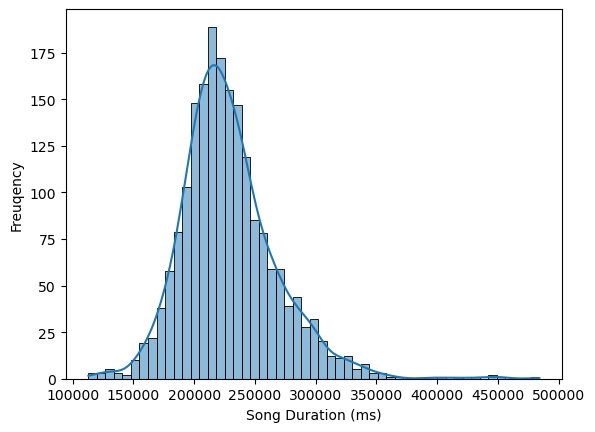

In [160]:
# Data Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data = dataframe_filtered, x = 'duration_ms', kde = True)
plt.xlabel('Song Duration (ms)')
plt.ylabel('Freuqency')
plt.show()

In [128]:
mean = dataframe_filtered['duration_ms'].mean()
median = dataframe_filtered['duration_ms'].median()
print(f"Mean: {mean}, Median: {median}")

Mean: 228594.97372488407, Median: 223186.0


In rigt skewed data, the mean > median. According to the statitsics computed, the mean is 228,594.97 and the median is 223,186.00. Thus, we have confirmed that our data is right skewed or positvely skewed. 

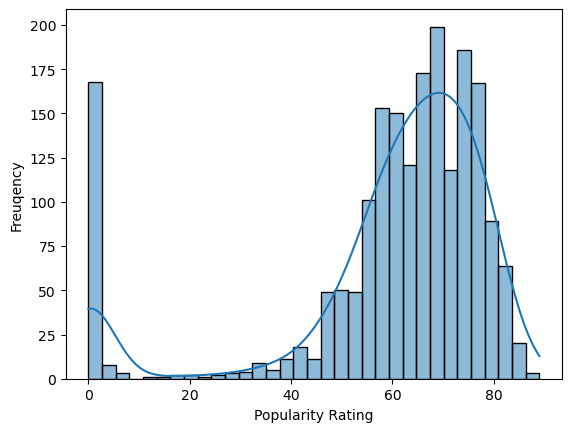

In [129]:
sns.histplot(data = dataframe_filtered, x = 'popularity', kde = True)
plt.xlabel('Popularity Rating')
plt.ylabel('Freuqency')
plt.show()

In [130]:
mean = dataframe_filtered['popularity'].mean()
median = dataframe_filtered['popularity'].median()
print(f"Mean: {mean}, Median: {median}")

Mean: 59.63317877382792, Median: 65.0


In left skewed data, the median > mean. In the statistics computed for 'popularity', the mean was 59.63 with a median of 65.0. 

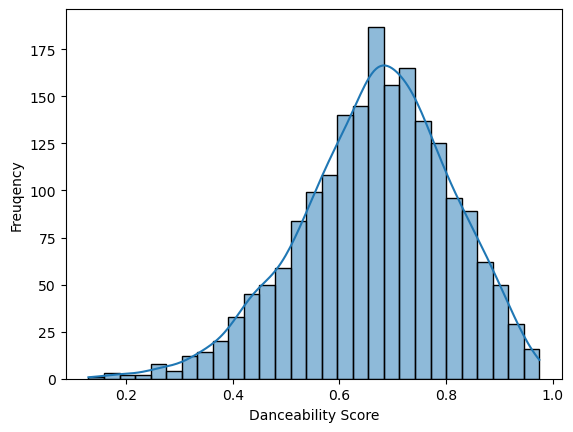

In [131]:
sns.histplot(data = dataframe_filtered, x = 'danceability', kde = True)
plt.xlabel('Danceability Score')
plt.ylabel('Freuqency')
plt.show()

In [132]:
mean = dataframe_filtered['danceability'].mean()
median = dataframe_filtered['danceability'].median()
print(f"Mean: {mean}, Median: {median}")

Mean: 0.6678140133951572, Median: 0.676


The distribution of danceability ratings revealed a symmetric distribution with equal mean and median. Thus, the distribution of danceability scores are uniform. 

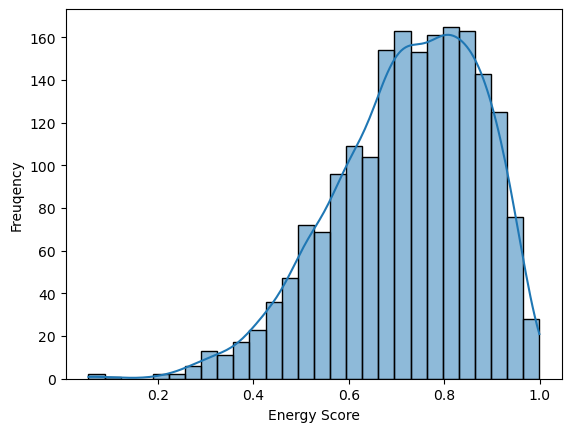

In [133]:
sns.histplot(data = dataframe_filtered, x = 'energy', kde = True)
plt.xlabel('Energy Score')
plt.ylabel('Freuqency')
plt.show()

In [134]:
mean = dataframe_filtered['energy'].mean()
median = dataframe_filtered['energy'].median()
print(f"Mean: {mean}, Median: {median}")

Mean: 0.7215486862442041, Median: 0.739


The distribution of energy scores revealed that syemmetric distribution with median and mean approximately equal. Thus, the distribution of energy scores appear appoximately uniform. 

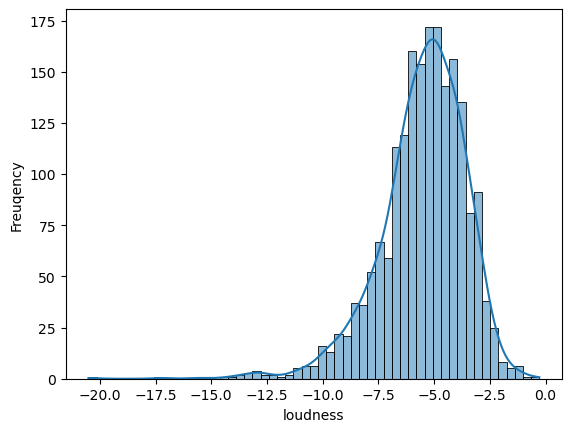

In [135]:
sns.histplot(data = dataframe_filtered, x = 'loudness', kde = True)
plt.xlabel('loudness')
plt.ylabel('Freuqency')
plt.show()

In [136]:
mean = dataframe_filtered['loudness'].mean()
median = dataframe_filtered['loudness'].median()
print(f"Mean: {mean}, Median: {median}")

Mean: -5.5140824317362185, Median: -5.285


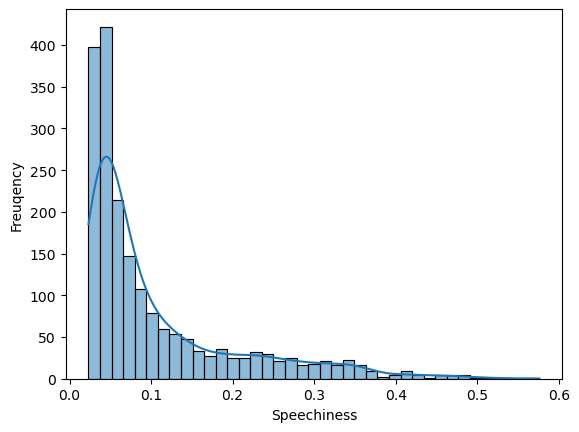

In [137]:
sns.histplot(data = dataframe_filtered, x = 'speechiness', kde = True)
plt.xlabel('Speechiness')
plt.ylabel('Freuqency')
plt.show()

In [138]:
mean = dataframe_filtered['speechiness'].mean()
median = dataframe_filtered['speechiness'].median()
print(f"Mean: {mean}, Median: {median}")

Mean: 0.10378258629572386, Median: 0.061


In right skewed data, the mean > median. In the statistics computed for 'speechiness', the mean was 0.10 with a median of 0.06. Thus, 'speechiness' is right skewed. 

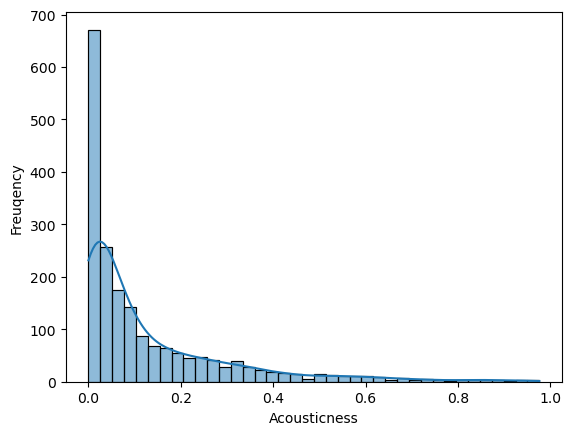

In [139]:
sns.histplot(data = dataframe_filtered, x = 'acousticness', kde = True)
plt.xlabel('Acousticness')
plt.ylabel('Freuqency')
plt.show()

In [140]:
mean = dataframe_filtered['acousticness'].mean()
median = dataframe_filtered['acousticness'].median()
print(f"Mean: {mean}, Median: {median}")

Mean: 0.12817264961360122, Median: 0.0558


In right skewed data, the mean > median. In the statistics computed for 'acousticness', the mean was 0.13 with a median of 0.06. Thus, 'acousticness' is right skewed. 

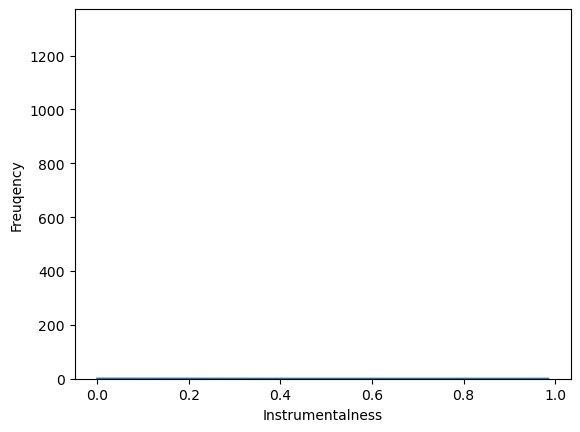

In [166]:
sns.histplot(data = dataframe_filtered, x = 'instrumentalness', kde = True)
plt.xlabel('Instrumentalness')
plt.ylabel('Freuqency')
plt.show()

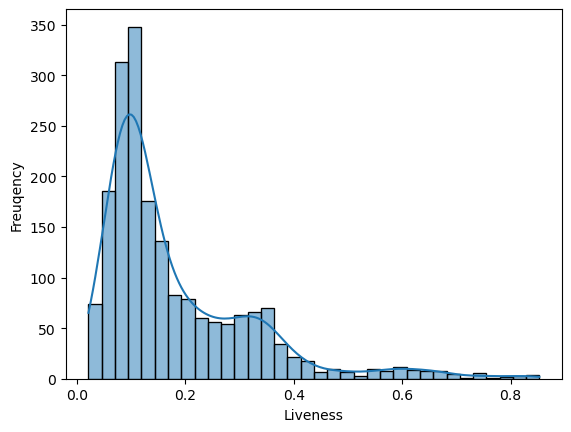

In [142]:
sns.histplot(data = dataframe_filtered, x = 'liveness', kde = True)
plt.xlabel('Liveness')
plt.ylabel('Freuqency')
plt.show()

In [143]:
mean = dataframe_filtered['liveness'].mean()
median = dataframe_filtered['liveness'].median()
print(f"Mean: {mean}, Median: {median}")

Mean: 0.18172632663575478, Median: 0.124


The distribution of liveness revealed a positively skewed distribution with mean 0.18 and median 0.12, meaning most songs have low liveness scores but few have very high values (above 0.8) indicating the likehood that the track is live. 

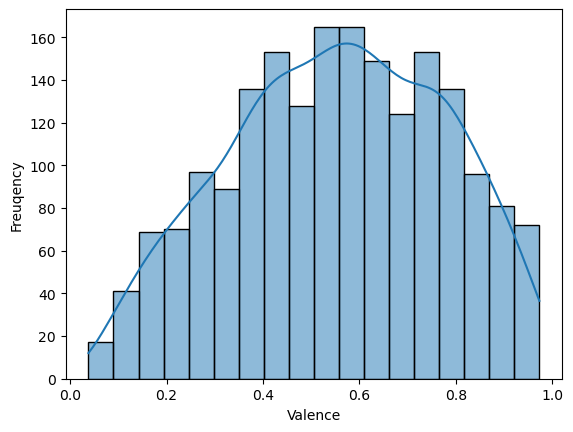

In [144]:
sns.histplot(data = dataframe_filtered, x = 'valence', kde = True)
plt.xlabel('Valence')
plt.ylabel('Freuqency')
plt.show()

In [145]:
mean = dataframe_filtered['valence'].mean()
median = dataframe_filtered['valence'].median()
print(f"Mean: {mean}, Median: {median}")

Mean: 0.5529661514683153, Median: 0.56


The distribution for 'valence' revealed equal mean and median suggesting an approximatley symmetric distribution with no strong skew. The symmetric distribution around ~ 0.55-0.56 implies a balanced mix of emotional tones in the dataset. Valence is the musical measure of 'positivness' on a 0-1.0 scale. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

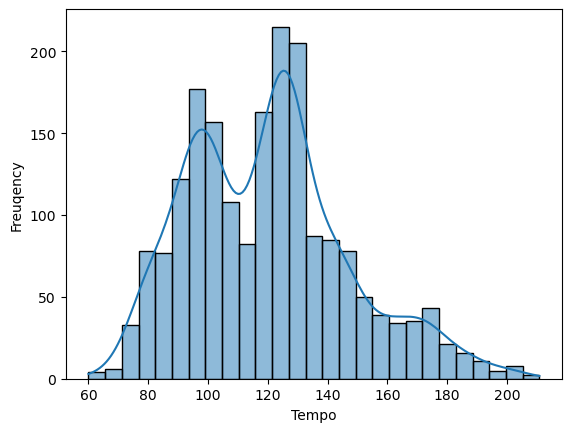

In [146]:
sns.histplot(data = dataframe_filtered, x = 'tempo', kde = True)
plt.xlabel('Tempo')
plt.ylabel('Freuqency')
plt.show()

In [147]:
mean = dataframe_filtered['tempo'].mean()
median = dataframe_filtered['tempo'].median()
print(f"Mean: {mean}, Median: {median}")

Mean: 120.15844204018548, Median: 120.028


The distribution for 'tempo' revealed equal mean and median suggesting an approximatley symmetric distribution with no strong skew. The symmetric distribution around ~ 90-130 BPM implies a typical tempo for hip-hop, dance, and pop tracks. Thus, the dataset has a balanced mix of song speeds. 

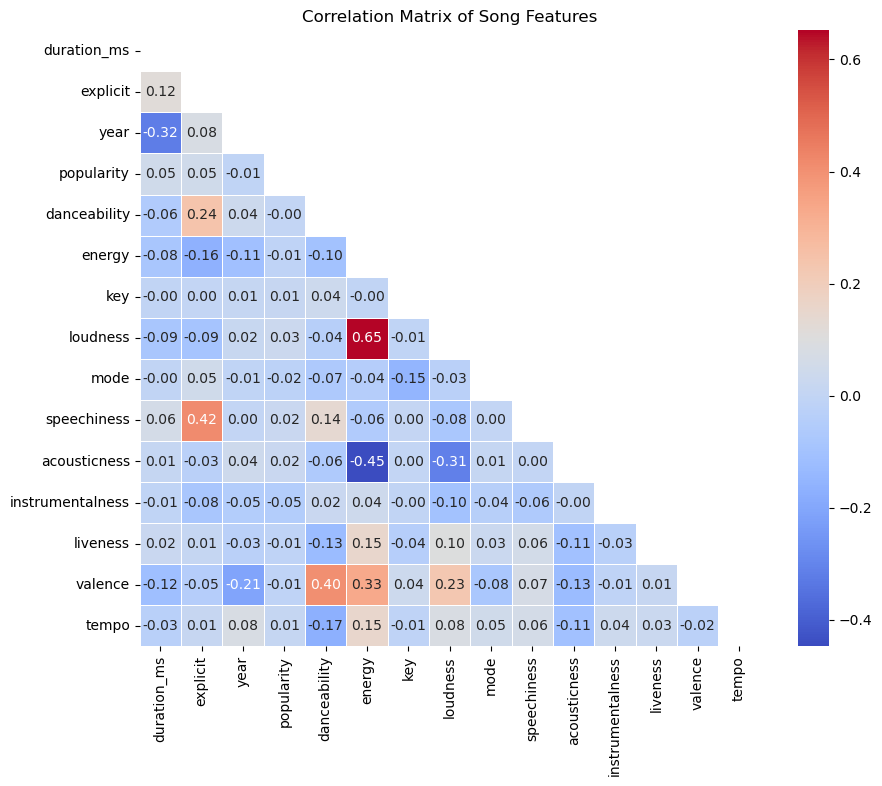

In [114]:
import numpy as np
# Calculate correlation matrix - numerical columns only 
corr_matrix = dataframe_filtered.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool)) # avoids redundant values and the 1.00s on the diagonal 

# Creating Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Song Features')
plt.show()

Correlation plot revealed that there is a strong positive correlation between energy and loudness. As the loudness of the track increases so does the energy. Acousticness and energy are moderately negatively correlated. As acousticness decreases, energy will typically increase such as the use of electronic or heavily produced tracks. In addition, acoustiness and loudness are weakly negatively correlated. As acoustincess increases, such as the use of natural sounds, loudness tends to decrease. When acoustincess is lowered, loudness will increase. Valence and danceability are moderatly positvely correlated with a correlation value of 0.40. As valence (music positivity) increases, it is expected that danceability will increase. Speechiness and explicit are positvely correlated with a correlation value of 0.40. Songs that are more spoken - such as rap and hip-hop - are more likely to contain explicty content (profanity or adult themes). 

## **Initial Insights & Hypothesis**

We initially hypothesized that the average duration of top-hit songs has declined from 2000 to 2019, influenced by the digital age’s emphasis on shorter attention spans and the economics of music streaming platforms, which may favor shorter songs to increase play counts and maximize revenue. We also hypothesized that tracks featuring collaborations—such as guest artists or remixes—are more likely to have higher popularity scores, as they appeal to a broader audience. Additionally, we expect to observe shifts in the popularity of certain music genres over time, driven by changing cultural preferences and generational listening habits. These hypotheses reflect the story that cultural changes have had a measurable imapct on the features of hit tracks over the past two decades. 

## **Modeling/Analysis Strategy** 

Our modeling and analysis strategy began with a thorough data cleaning and preprocessing of the "Top Hits Spotify (2000–2019)" dataset. This included handling missing entries, removing duplicated columns, converting columns to appropriate numeric types, and identifying unique values.

Next, EDA was performed to understand the structure and distribution of top-hit song features. This includes calculating descriptive statistics and using visualizations such as histograms and boxplots to detect skewneess and/or outliers. 

To identify possible relationships between track features, a correlation matrix was computed and visualized using a heatmap. The correlation matrix identified moderate to severe correlations amoung popularity, danceability, energy, and loudness. 

## **Project Goals**

The primary goal of this analysis is to investigate temporal trends in the top Spotify hits from 2000 to 2019, focusing on song duration and popularity. Our exploratory data anlysis will aim to uncover patterns in track features while also identifying potential outlier and correltations. By examining these temporal trends, we hope to understand listener behaviors, streaming platforms, and cultural influences that have shaped 'popular' music. 

## **Problems Faced**